# Analysis of our chosen dataset
The purpose of this notebook is to provide some analysis on the dataset that we have chosen to use.

In [1]:
import numpy as np

In [2]:
# First let's read in our dataset.
import pandas as pd
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Let's combine the title and text into one column.
df['news'] = df['title'] + ' ' + df['text']
df

,Unnamed: 0,title,text,label,news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [4]:
# Now let's convert the 'REAL' or 'FAKE' labels to a binary classification.
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df

,Unnamed: 0,title,text,label,news
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1,State Department says it can't find emails fro...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0,Anti-Trump Protesters Are Tools of the Oligarc...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1,"In Ethiopia, Obama seeks progress on peace, se..."


In [5]:
# Here we remove the unnecessary columns, so we just have the text input and binary classification output columns.
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df

,label,news
0,0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,1,Kerry to go to Paris in gesture of sympathy U....
3,0,Bernie supporters on Twitter erupt in anger ag...
4,1,The Battle of New York: Why This Primary Matte...
...,...,...
6330,1,State Department says it can't find emails fro...
6331,0,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,0,Anti-Trump Protesters Are Tools of the Oligarc...
6333,1,"In Ethiopia, Obama seeks progress on peace, se..."


In [6]:
# It's now time for a bit of preprocessing...
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filter_sentence = ''
    sentence = row['news']
    # Tokenization
    words = [word.lower() for word in nltk.word_tokenize(sentence)]
    # Stopwords removal
    words = [word for word in words if not word in stop_words]
    # Removing all punctuation
    words = [word for word in words if word.isalpha()]
    # Lemmatization
    for word in words:
        filter_sentence = filter_sentence  + ' ' + str(WNL.lemmatize(word)).lower()
    filter_sentence = filter_sentence[1:]
    
    df.loc[index, 'news'] = filter_sentence
df.head()

,label,news
0,0,smell hillary fear daniel greenfield shillman ...
1,0,watch exact moment paul ryan committed politic...
2,1,kerry go paris gesture sympathy secretary stat...
3,0,bernie supporter twitter erupt anger dnc tried...
4,1,battle new york primary matter primary day new...


## Most common words

We now want to find the most common words used in the news articles in our dataset.

In [7]:
# Let's create a dictionary of all words used in any article in our dataset and their corresponding word count.
word_count = {}
for index, row in df.iterrows():
    sentence = row['news']
    words = nltk.word_tokenize(sentence)
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
word_count 

{'smell': 45,
 'hillary': 7708,
 'fear': 1022,
 'daniel': 109,
 'greenfield': 18,
 'shillman': 5,
 'journalism': 180,
 'fellow': 491,
 'freedom': 1096,
 'center': 1349,
 'new': 9542,
 'york': 2232,
 'writer': 299,
 'focusing': 180,
 'radical': 456,
 'islam': 361,
 'final': 794,
 'stretch': 149,
 'election': 6512,
 'rodham': 126,
 'clinton': 18512,
 'gone': 542,
 'war': 4482,
 'fbi': 2556,
 'word': 1634,
 'unprecedented': 282,
 'thrown': 135,
 'around': 2396,
 'often': 1268,
 'ought': 156,
 'retired': 416,
 'still': 3436,
 'nominee': 2039,
 'major': 1573,
 'political': 5228,
 'party': 6492,
 'go': 3642,
 'exactly': 636,
 'people': 11793,
 'done': 1386,
 'coma': 11,
 'patient': 306,
 'waking': 82,
 'watching': 327,
 'hour': 1234,
 'cnn': 1644,
 'hospital': 365,
 'bed': 105,
 'would': 12976,
 'assume': 184,
 'director': 1394,
 'james': 690,
 'comey': 1141,
 'opponent': 681,
 'attack': 3498,
 'everyone': 1044,
 'obama': 8496,
 'circulated': 46,
 'letter': 814,
 'attacking': 259,
 'currentl

In [8]:
word_count_df = pd.DataFrame(word_count.items(), columns = ['word','count'])
word_count_df = word_count_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)
word_count_df.head(20)

,word,count
0,trump,23044
1,said,21176
2,clinton,18512
3,state,15058
4,would,12976
5,one,11897
6,people,11793
7,republican,9628
8,new,9542
9,president,8904


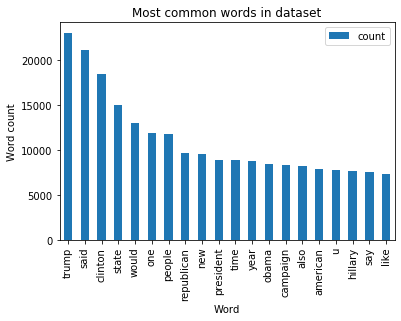

In [10]:
# We can plot this on a bar graph.
import matplotlib.pyplot as plt
bar_graph = word_count_df.head(20).plot.bar(x='word')
plt.title('Most common words in dataset')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

In [11]:
# Now lets see if there is any difference between the most common words in the articles labelled as real vs fake.

# Creating a word count for fake news articles.
word_count_fake = {}
for index, row in df.iterrows():
    if row['label'] == 0:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_fake:
                word_count_fake[word] += 1
            else:
                word_count_fake[word] = 1
                
# Creating a word count for real news articles.
word_count_real = {}
for index, row in df.iterrows():
    if row['label'] == 1:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_real:
                word_count_real[word] += 1
            else:
                word_count_real[word] = 1

In [12]:
word_count_fake_df = pd.DataFrame(word_count_fake.items(), columns = ['word','count'])
word_count_fake_df = word_count_fake_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

word_count_real_df = pd.DataFrame(word_count_real.items(), columns = ['word','count'])
word_count_real_df = word_count_real_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

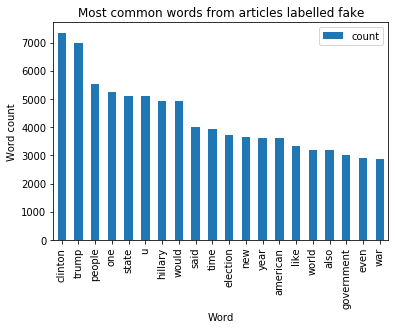

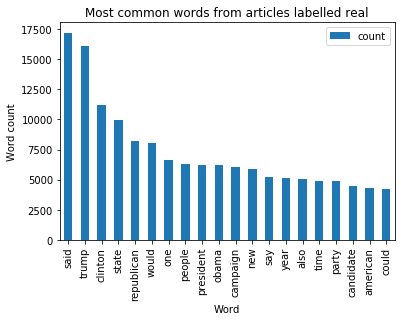

In [13]:
bar_graph_fake = word_count_fake_df.head(20).plot.bar(x='word')
plt.title('Most common words from articles labelled fake')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

bar_graph_real = word_count_real_df.head(20).plot.bar(x='word')
plt.title('Most common words from articles labelled real')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

## Ratio of fake to real

Let's find out how many articles are in our dataset and the number which are fake and real.

In [14]:
print('There are ' + str(len(df)) + ' articles in our dataset.')

There are 6335 articles in our dataset.


In [15]:
print('There are ' + str(len(df[df['label']==1])) + ' real news articles and ' + str(len(df[df['label']==0])) + ' fake news articles in our dataset.')

There are 3171 real news articles and 3164 fake news articles in our dataset.


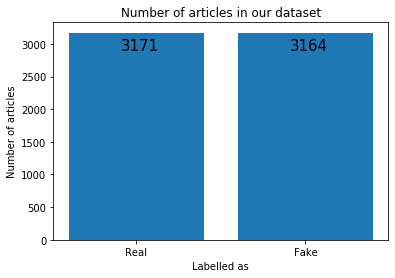

In [16]:
x = ['Real','Fake']
y = [len(df[df['label']==1]),len(df[df['label']==0])]
plt.bar(x,y)
plt.title('Number of articles in our dataset')
plt.xlabel('Labelled as')
plt.ylabel('Number of articles')
plt.text(-0.09,2900,str(len(df[df['label']==1])),fontsize=15)
plt.text(0.91,2900,str(len(df[df['label']==0])),fontsize=15)
plt.show()

## Analysis on length of articles

We are now going to analyse the length of our articles. We are focusing on the length of the articles after the stopwords and punctuation have been removed, as this is what we will ultimately be running our model on.

In [17]:
article = df.iloc[0]['news']
words = nltk.word_tokenize(article)
len(words)

670

In [19]:
df_test = df
df_test['length'] = np.nan
df_test

,label,news,length
0,0,smell hillary fear daniel greenfield shillman ...,NaN
1,0,watch exact moment paul ryan committed politic...,NaN
2,1,kerry go paris gesture sympathy secretary stat...,NaN
3,0,bernie supporter twitter erupt anger dnc tried...,NaN
4,1,battle new york primary matter primary day new...,NaN
...,...,...,...
6330,1,state department say ca find email clinton spe...,NaN
6331,0,p pb stand plutocratic pentagon p pb stand plu...,NaN
6332,0,protester tool oligarchy information protester...,NaN
6333,1,ethiopia obama seek progress peace security ea...,NaN


In [20]:
for index, row in df_test.iterrows():
    article = row['news']
    article_length = len(nltk.word_tokenize(article))
    df_test['length'][index] = article_length

/Users/maxkirwan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df_test

,label,news,length
0,0,smell hillary fear daniel greenfield shillman ...,670.0
1,0,watch exact moment paul ryan committed politic...,241.0
2,1,kerry go paris gesture sympathy secretary stat...,240.0
3,0,bernie supporter twitter erupt anger dnc tried...,239.0
4,1,battle new york primary matter primary day new...,174.0
...,...,...,...
6330,1,state department say ca find email clinton spe...,383.0
6331,0,p pb stand plutocratic pentagon p pb stand plu...,1196.0
6332,0,protester tool oligarchy information protester...,1004.0
6333,1,ethiopia obama seek progress peace security ea...,627.0


In [22]:
# We now have an array of article lengths.
article_lengths = np.asarray(df_test['length'])
article_lengths

array([ 670.,  241.,  240., ..., 1004.,  627.,  442.])

In [23]:
print('Minimum article length:' + str(min(article_lengths)))
print('Maximum article length: ' + str(max(article_lengths)))
print('Mean article length: ' + str(np.mean(article_lengths)))
print('Median article length: ' + str(np.median(article_lengths)))

Minimum article length:2.0
Maximum article length: 9948.0
Mean article length: 419.83677979479086
Median article length: 331.0


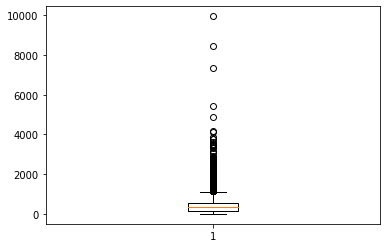

In [24]:
plt.boxplot(article_lengths)
plt.show()

In [25]:
# We clearly have some very short articles in our dataset.
np.where(article_lengths<5)

(array([2650, 2788, 4014, 4713, 5088, 5639, 5699, 5772]),)

In [26]:
df.iloc[4713]

label             0
news      world war
length            2
Name: 4713, dtype: object

In [27]:
pd.read_csv('news.csv').iloc[4713]

Unnamed: 0            8626
title         World War 3?
text                      
label                 FAKE
Name: 4713, dtype: object

In [28]:
# Now let's compare between real and fake news articles.
fake = df_test[df_test['label']==0]
real = df_test[df_test['label']==1]

In [29]:
fake_article_lengths = np.asarray(fake['length'])
real_article_lengths = np.asarray(real['length'])

In [30]:
feature = ['Minimum', 'Maximum', 'Mean', 'Median']
real_values = [min(fake_article_lengths), max(fake_article_lengths), np.mean(fake_article_lengths), np.median(fake_article_lengths)]
fake_values = [min(real_article_lengths), max(real_article_lengths), np.mean(real_article_lengths), np.median(real_article_lengths)]
total_values = [min(article_lengths), max(article_lengths), np.mean(article_lengths), np.median(article_lengths)]
article_lengths_df = pd.DataFrame(list(zip(feature,real_values,fake_values,total_values)),columns=['Feature','Real articles','Fake articles','Total'])
article_lengths_df

,Feature,Real articles,Fake articles,Total
0,Minimum,2.000000,6.00000,2.00000
1,Maximum,9948.000000,3847.00000,9948.00000
2,Mean,365.385588,474.16777,419.83678
3,Median,232.000000,416.00000,331.00000


It seems that the fake news articles are slightly longer on average.

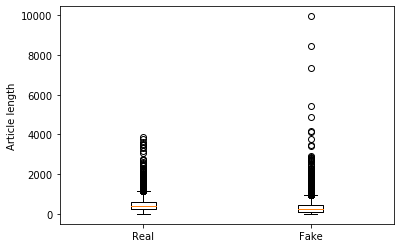

In [31]:
plt.boxplot([real_article_lengths,fake_article_lengths],labels=['Real','Fake'])
plt.ylabel('Article length')
plt.show()